<a href="https://colab.research.google.com/github/jsaulme/Aprendizaje_Automatico_MCD/blob/main/tareas/06_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
# Importar las bibliotecas necesarias
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np
import numpy as np

from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [68]:
# Cargar el dataset
url = "https://raw.githubusercontent.com/jsaulme/datasets/main/Global_superstore2018_procesado.csv"
data = pd.read_csv(url)
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Ship Day,Ship Month,Ship Year,Delivery Time
0,MX-2017-SC2057582-43010,2017-10-02,2017-10-06,Standard Class,SC-2057582,Sonia Cooley,Consumer,0,Mexico City,Distrito Federal,...,4.56,2.033,Medium,2017,10,2,6,10,2017,4
1,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,90.72,13.449,Medium,2015,10,15,20,10,2015,5
2,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,54.08,9.627,Medium,2015,10,15,20,10,2015,5
3,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,4.96,1.371,Medium,2015,10,15,20,10,2015,5
4,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,11.44,3.787,Medium,2015,10,15,20,10,2015,5


In [69]:
data.dtypes

Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Postal Code         int64
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Product Name       object
Sub-Category       object
Category           object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
Order Year          int64
Order Month         int64
Order Day           int64
Ship Day            int64
Ship Month          int64
Ship Year           int64
Delivery Time       int64
dtype: object

In [70]:
#data.select_dtypes(include=['number'])
data.select_dtypes(include=["number"]).columns

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Year', 'Order Month', 'Order Day', 'Ship Day',
       'Ship Month', 'Ship Year', 'Delivery Time'],
      dtype='object')

In [71]:
# Preprocesamiento de datos
# Crear una nueva columna para indicar si el profit es negativo o no
data['Profit_Negative'] = data['Profit'] < 0

# Definir las características (features) y la variable objetivo (target)
X_5 = data[['Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost']]     # Definir las características relevantes
y = data['Profit_Negative']  # Definir la variable objetivo

data.head().iloc[:,10:]

,Country,Region,Market,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Ship Day,Ship Month,Ship Year,Delivery Time,Profit_Negative
0,Mexico,Central America,LATAM,OFF-LA-4658,"Hon File Folder Labels, Adjustable",Labels,Office Supplies,13.08,3,0.0,...,2.033,Medium,2017,10,2,6,10,2017,4,False
1,Colombia,South America,LATAM,FUR-FU-6238,"Tenex Clock, Durable",Furnishings,Furniture,252.16,8,0.0,...,13.449,Medium,2015,10,15,20,10,2015,5,False
2,Colombia,South America,LATAM,FUR-BO-4845,"Ikea 3-Shelf Cabinet, Mobile",Bookcases,Furniture,193.28,2,0.0,...,9.627,Medium,2015,10,15,20,10,2015,5,False
3,Colombia,South America,LATAM,OFF-BI-3720,"Cardinal Binder, Clear",Binders,Office Supplies,35.44,4,0.0,...,1.371,Medium,2015,10,15,20,10,2015,5,False
4,Colombia,South America,LATAM,OFF-AR-5905,"Sanford Canvas, Water Color",Art,Office Supplies,71.60,2,0.0,...,3.787,Medium,2015,10,15,20,10,2015,5,False


In [72]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y, test_size=0.2, random_state=18)

# Normalizar características si es necesario
scaler = StandardScaler()
X_train_5 = scaler.fit_transform(X_train_5)
X_test_5 = scaler.transform(X_test_5)

# Inicializar los clasificadores
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Entrenar y evaluar los modelos
for clf_name, clf in classifiers.items():
    clf.fit(X_train_5, y_train_5)
    y_pred_5 = clf.predict(X_test_5)

    print(f'##### Clasificador: {clf_name} #####')

    # Medir la precisión del modelo
    accuracy = accuracy_score(y_test_5, y_pred_5)
    print(f'Accuracy de {clf_name}: {accuracy}')

    # Mostrar reporte de clasificación
    print(f'Classification Report de {clf_name}:')
    print(classification_report(y_test_5, y_pred_5))

    # Mostrar matriz de confusión
    print(f'Confusion Matrix de {clf_name}:')
    print(confusion_matrix(y_test_5, y_test_5))
    print('\n')


##### Clasificador: Logistic Regression #####
Accuracy de Logistic Regression: 0.9736790797426399
Classification Report de Logistic Regression:
              precision    recall  f1-score   support

       False       0.98      0.99      0.98      7693
        True       0.96      0.93      0.95      2565

    accuracy                           0.97     10258
   macro avg       0.97      0.96      0.96     10258
weighted avg       0.97      0.97      0.97     10258

Confusion Matrix de Logistic Regression:
[[7693    0]
 [   0 2565]]


##### Clasificador: Naive Bayes #####
Accuracy de Naive Bayes: 0.9298108793137064
Classification Report de Naive Bayes:
              precision    recall  f1-score   support

       False       0.94      0.97      0.95      7693
        True       0.90      0.81      0.85      2565

    accuracy                           0.93     10258
   macro avg       0.92      0.89      0.90     10258
weighted avg       0.93      0.93      0.93     10258

Confusion Ma

In [73]:
# Definir umbral para determinar si el desempeño fue "bueno"
good_threshold = 0.8  # 80% de precisión

for clf_name, clf in classifiers.items():
    clf.fit(X_train_5, y_train_5)
    y_pred = clf.predict(X_test_5)

    # Medir las métricas de desempeño
    accuracy = accuracy_score(y_test_5, y_pred_5)
    precision = precision_score(y_test_5, y_pred_5)
    recall = recall_score(y_test_5, y_pred_5)
    f1 = f1_score(y_test_5, y_pred_5)

    # Determinar si el desempeño fue "Bueno" o "Regular"
    performance = "Bueno" if accuracy >= good_threshold else "Regular"

    # Imprimir resultados
    print(f'### Evaluación del clasificador: {clf_name} ###')
    print(f'Precisión: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print(f'Exactitud (Accuracy): {accuracy:.2f}')
    print(f'Desempeño (Performance): {performance}')
    print(f'Reporte de clasificación de {clf_name}:')
    print(classification_report(y_test, y_pred))
    print(f'Matriz de confusión de {clf_name}:')
    print(confusion_matrix(y_test, y_pred))
    print('\n')


### Evaluación del clasificador: Logistic Regression ###
Precisión: 1.00
Recall: 1.00
F1-score: 1.00
Exactitud (Accuracy): 1.00
Desempeño (Performance): Bueno
Reporte de clasificación de Logistic Regression:
              precision    recall  f1-score   support

       False       0.98      0.99      0.98      7693
        True       0.96      0.93      0.95      2565

    accuracy                           0.97     10258
   macro avg       0.97      0.96      0.96     10258
weighted avg       0.97      0.97      0.97     10258

Matriz de confusión de Logistic Regression:
[[7599   94]
 [ 176 2389]]


### Evaluación del clasificador: Naive Bayes ###
Precisión: 1.00
Recall: 1.00
F1-score: 1.00
Exactitud (Accuracy): 1.00
Desempeño (Performance): Bueno
Reporte de clasificación de Naive Bayes:
              precision    recall  f1-score   support

       False       0.94      0.97      0.95      7693
        True       0.90      0.81      0.85      2565

    accuracy                        

<a id='07_Metricas'></a>

<a id='07_Metricas'></a>

# Tarea 7 Métricas de Desempeño

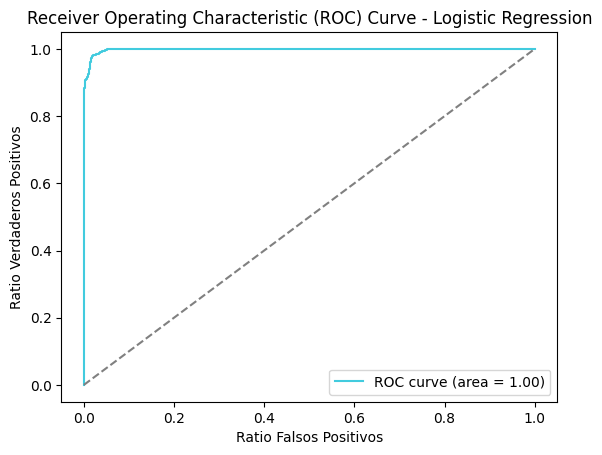

In [74]:
# Entrenar el modelo
logistic_regression = classifiers['Logistic Regression']
logistic_regression.fit(X_train_5, y_train_5)

# Obtener las probabilidades predichas
y_pred_5_prob = logistic_regression.predict_proba(X_test_5)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test_5, y_pred_5_prob)
auc = roc_auc_score(y_test_5, y_pred_5_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='#42CBDE', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Ratio Falsos Positivos')
plt.ylabel('Ratio Verdaderos Positivos')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

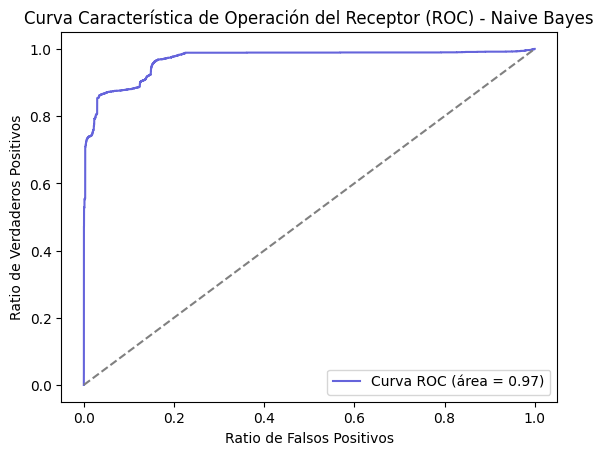

In [75]:
# Entrenar el modelo
naive_bayes = classifiers['Naive Bayes']
naive_bayes.fit(X_train_5, y_train_5)

# Obtener las probabilidades predichas
y_pred_5_prob = naive_bayes.predict_proba(X_test_5)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test_5, y_pred_5_prob)
auc = roc_auc_score(y_test_5, y_pred_5_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='#6564DB', label=f'Curva ROC (área = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Ratio de Falsos Positivos')
plt.ylabel('Ratio de Verdaderos Positivos')
plt.title('Curva Característica de Operación del Receptor (ROC) - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

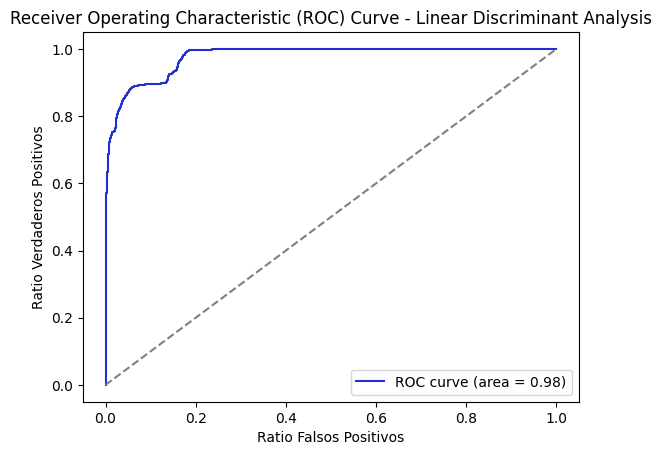

In [76]:
# Entrenar el modelo
lda = classifiers['Linear Discriminant Analysis']
lda.fit(X_train_5, y_train_5)

# Obtener las probabilidades predichas
y_pred_5_prob_lda = lda.predict_proba(X_test_5)[:, 1]

# Calcular la curva ROC y el AUC
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test_5, y_pred_5_prob_lda)
auc_lda = roc_auc_score(y_test_5, y_pred_5_prob_lda)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_lda, tpr_lda, color='#232ED1', label=f'ROC curve (area = {auc_lda:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Ratio Falsos Positivos')
plt.ylabel('Ratio Verdaderos Positivos')
plt.title('Receiver Operating Characteristic (ROC) Curve - Linear Discriminant Analysis')
plt.legend(loc="lower right")
plt.show()

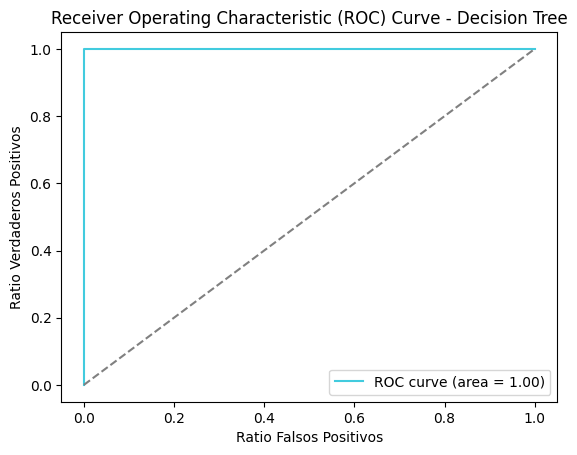

In [77]:
# Entrenar el modelo
decision_tree = classifiers['Decision Tree']
decision_tree.fit(X_train_5, y_train_5)

# Obtener las probabilidades predichas
y_pred_5_prob_dt = decision_tree.predict_proba(X_test_5)[:, 1]

# Calcular la curva ROC y el AUC
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_5, y_pred_5_prob_dt)
auc_dt = roc_auc_score(y_test_5, y_pred_5_prob_dt)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='#42CBDE', label=f'ROC curve (area = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Ratio Falsos Positivos')
plt.ylabel('Ratio Verdaderos Positivos')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

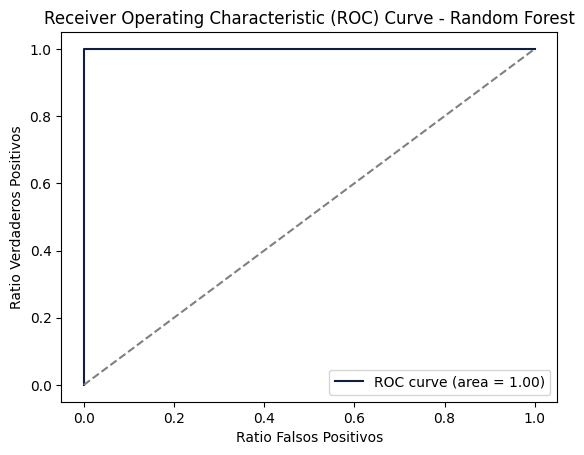

In [78]:
# Entrenar el modelo
random_forest = classifiers['Random Forest']
random_forest.fit(X_train_5, y_train_5)

# Obtener las probabilidades predichas
y_pred_5_prob_rf = random_forest.predict_proba(X_test_5)[:, 1]

# Calcular la curva ROC y el AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_5, y_pred_5_prob_rf)
auc_rf = roc_auc_score(y_test_5, y_pred_5_prob_rf)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='#101D42', label=f'ROC curve (area = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Ratio Falsos Positivos')
plt.ylabel('Ratio Verdaderos Positivos')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


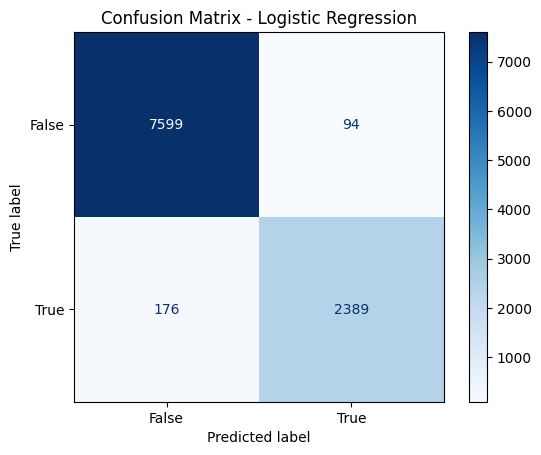

In [79]:
# Entrenar el modelo Logistic Regression
logistic_regression = classifiers['Logistic Regression']
logistic_regression.fit(X_train_5, y_train_5)

# Obtener las predicciones
y_pred_5_lr = logistic_regression.predict(X_test_5)

# Calcular la matriz de confusión
cm_lr = confusion_matrix(y_test_5, y_pred_5_lr)

# Graficar la matriz de confusión
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['False', 'True'])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')

plt.show()

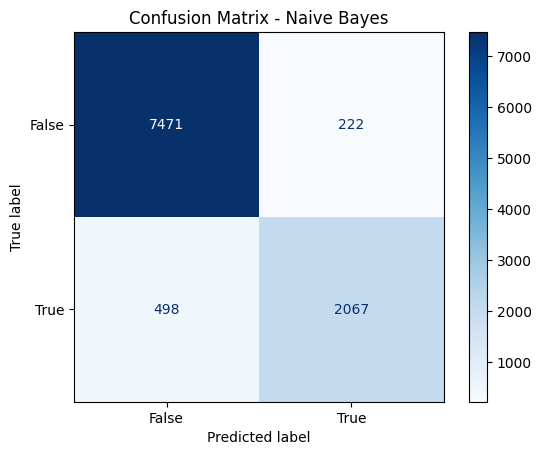

In [80]:
# Inicializar y entrenar el modelo Naive Bayes
naive_bayes = classifiers['Naive Bayes']
naive_bayes.fit(X_train_5, y_train_5)

# Obtener las predicciones
y_pred_5 = naive_bayes.predict(X_test_5)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_5, y_pred_5)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False', 'True'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

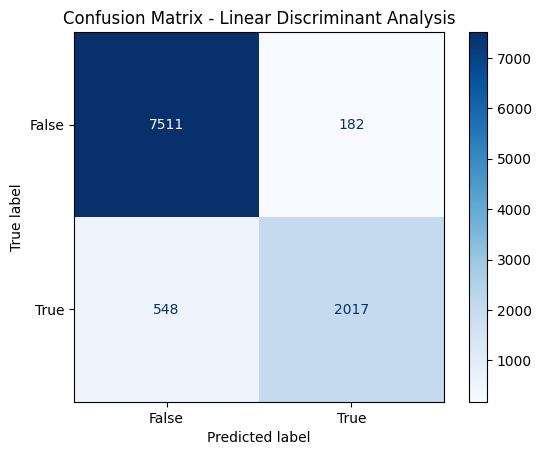

In [81]:
# Entrenar el modelo
lda = classifiers['Linear Discriminant Analysis']
lda.fit(X_train_5, y_train_5)

# Obtener las predicciones
y_pred_5_lda = lda.predict(X_test_5)

# Calcular la matriz de confusión
cm_lda = confusion_matrix(y_test, y_pred_5_lda)

# Graficar la matriz de confusión
disp_lda = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=['False', 'True'])
disp_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Linear Discriminant Analysis')
plt.show()

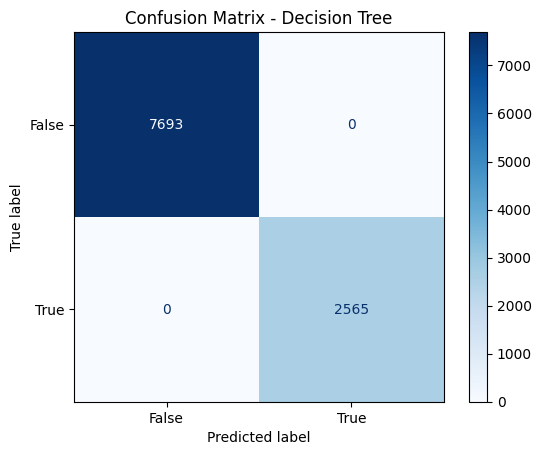

In [82]:
# Entrenar el modelo
decision_tree = classifiers['Decision Tree']
decision_tree.fit(X_train_5, y_train_5)

# Obtener las predicciones
y_pred_5_dt = decision_tree.predict(X_test_5)

# Calcular la matriz de confusión
cm_dt = confusion_matrix(y_test_5, y_pred_5_dt)

# Graficar la matriz de confusión
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['False', 'True'])
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

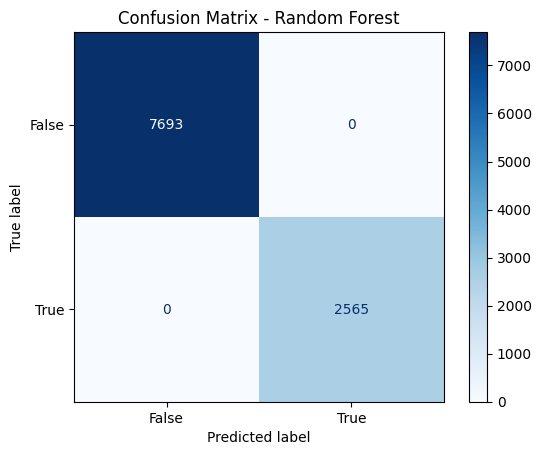

In [83]:
# Entrenar el modelo
random_forest = classifiers['Random Forest']
random_forest.fit(X_train_5, y_train_5)

# Obtener las predicciones
y_pred_5_rf = random_forest.predict(X_test_5)

# Calcular la matriz de confusión
cm_rf = confusion_matrix(y_test_5, y_pred_5_rf)

# Graficar la matriz de confusión
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['False', 'True'])
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.show()

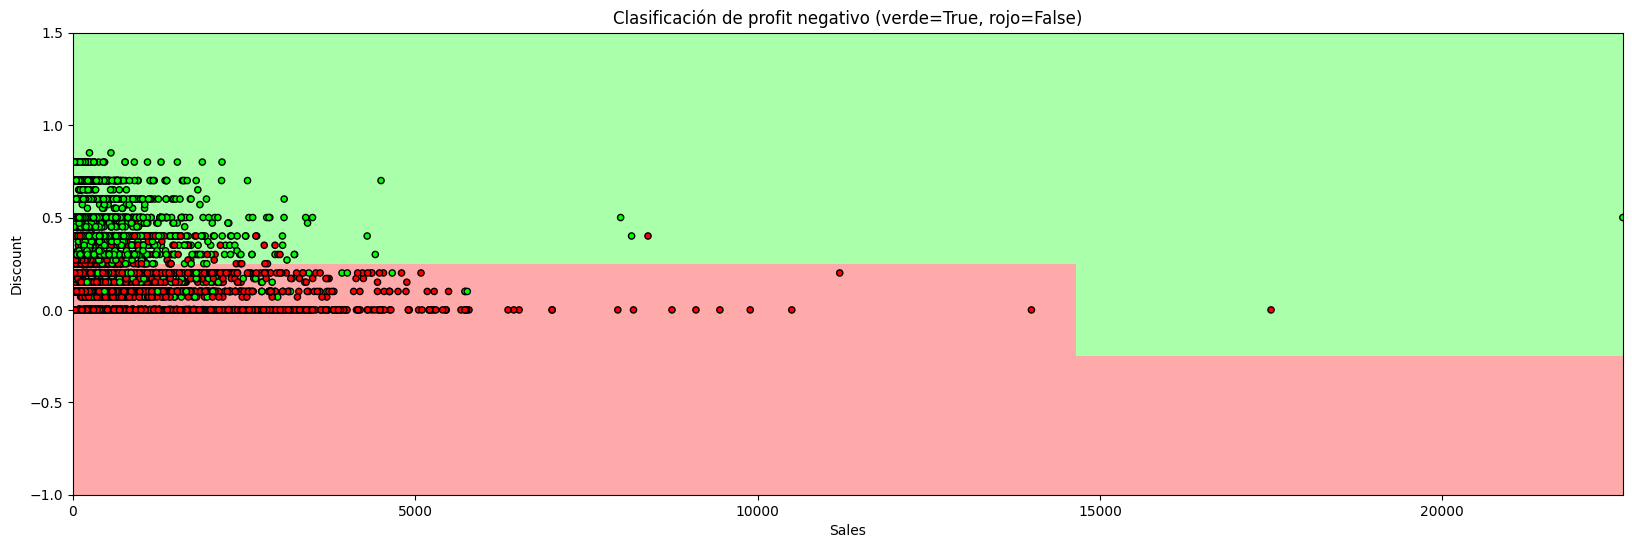

In [84]:
# Ahora seleccionaremos 2 caracteristicas para el grafico de discriminacion
X_mod = np.array(X[['Sales', 'Discount']])
y_mod = np.array(y)

# Crear mapa de colores
cmap_light_mod = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold_mod = ListedColormap(['#FF0000', '#00FF00'])

# Crear una malla de puntos para graficar
x_min_mod, x_max_mod = X_mod[:, 0].min() - 1, X_mod[:, 0].max() + 1
y_min_mod, y_max_mod = X_mod[:, 1].min() - 1, X_mod[:, 1].max() + 1
xx_mod, yy_mod = np.meshgrid(np.arange(x_min_mod, x_max_mod, .5),
                     np.arange(y_min_mod, y_max_mod, .5))

# Entrenar el modelo con las dos características principales
logistic_regression.fit(X_mod, y_mod)

# Predecir la clase para cada punto en la malla
Z_mod = logistic_regression.predict(np.c_[xx_mod.ravel(), yy_mod.ravel()])

# Poner el resultado en un gráfico de colores
Z_mod = Z_mod.reshape(xx_mod.shape)

# Aquí es donde estableces el tamaño del gráfico
plt.figure(figsize=(20, 6))

plt.pcolormesh(xx_mod, yy_mod, Z_mod, cmap=cmap_light_mod)

# Agregar las etiquetas de los ejes
plt.xlabel('Sales')
plt.ylabel('Discount')

# Graficar también los puntos de prueba
plt.scatter(X_mod[:, 0], X_mod[:, 1], c=y_mod, cmap=cmap_bold_mod, edgecolor='k', s=20)
plt.xlim(xx_mod.min(), xx_mod.max())
plt.ylim(yy_mod.min(), yy_mod.max())
plt.title("Clasificación de profit negativo (verde=True, rojo=False)")
plt.show()


#### Gráfico de dispersión que representa la clasificación de profit negativo (verde=True, rojo=False) utilizando un modelo de Regresión Logística.

Las áreas coloreadas (rojo y verde) representan las regiones de decisión del clasificador. Cada punto en el gráfico representa una observación del conjunto de datos, y su color indica la clase a la que pertenece según el modelo:

- Los puntos verdes representan observaciones que el modelo clasifica como profit negativo (True).

- Los puntos rojos representan observaciones que el modelo clasifica como profit no negativo (False).

El eje x representa “Sales” y el eje y representa “Discount”. Por lo tanto, se puede ver cómo estas dos características contribuyen a la decisión del modelo de si el profit es negativo o no.

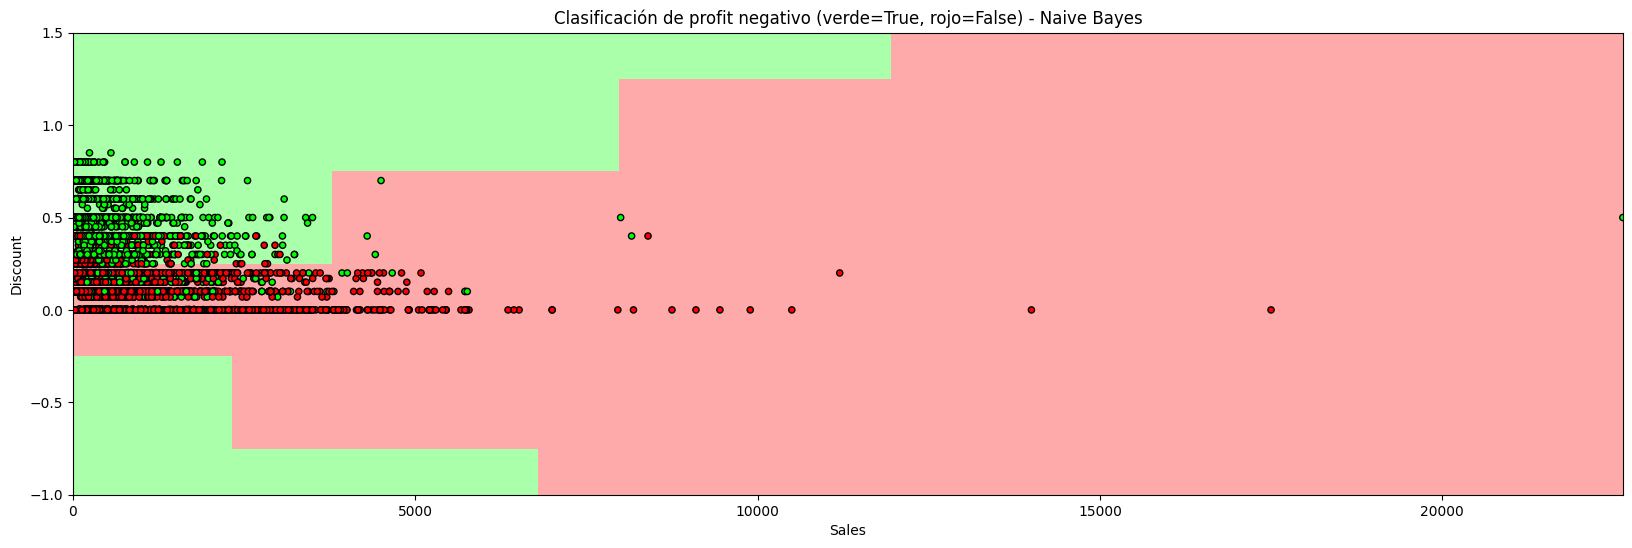

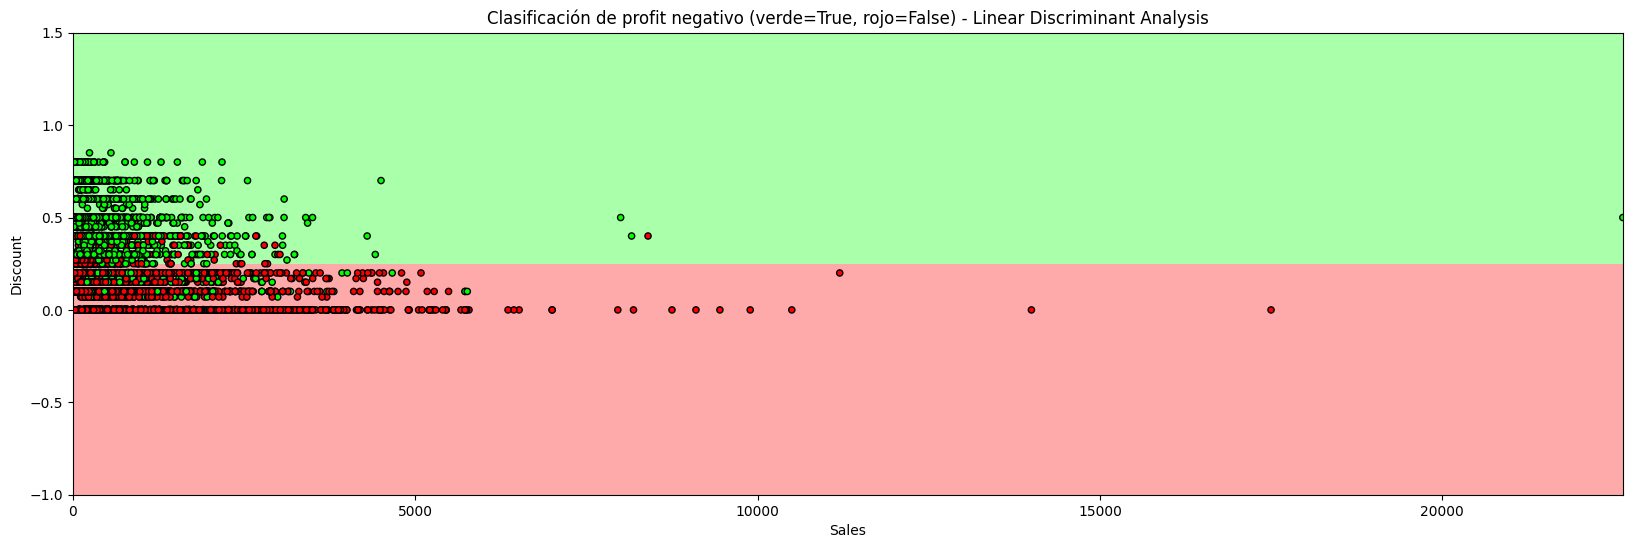

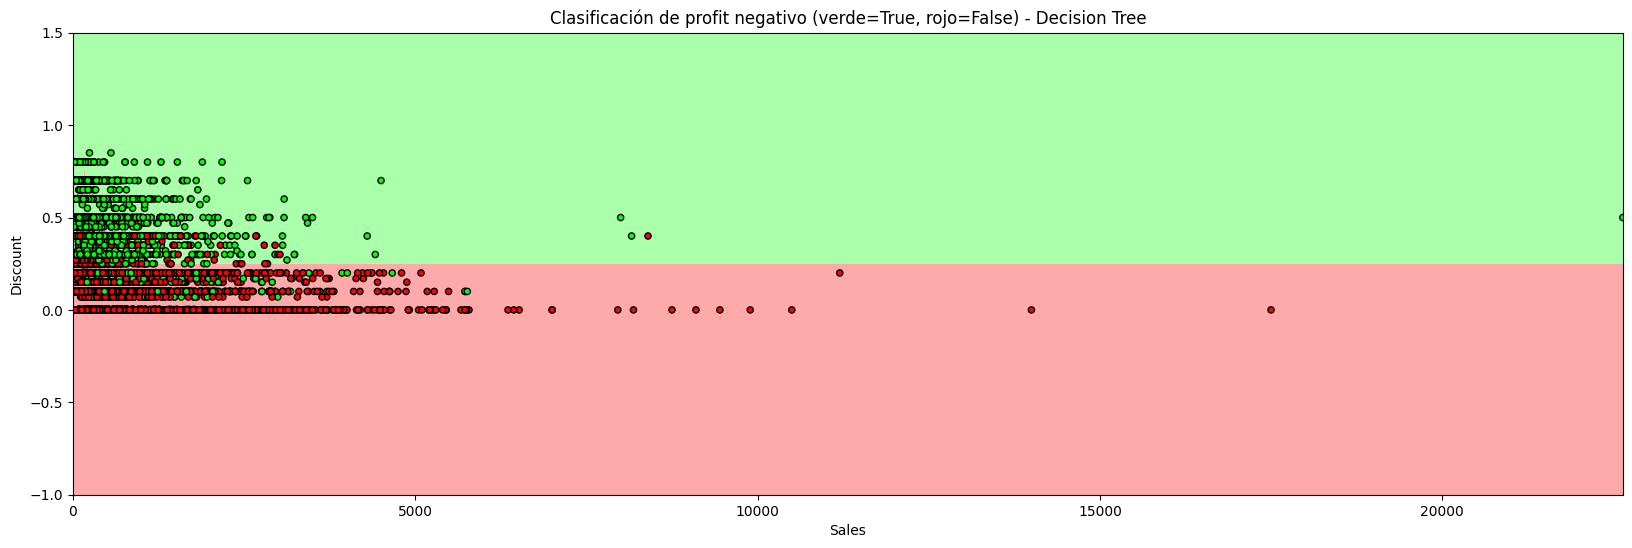

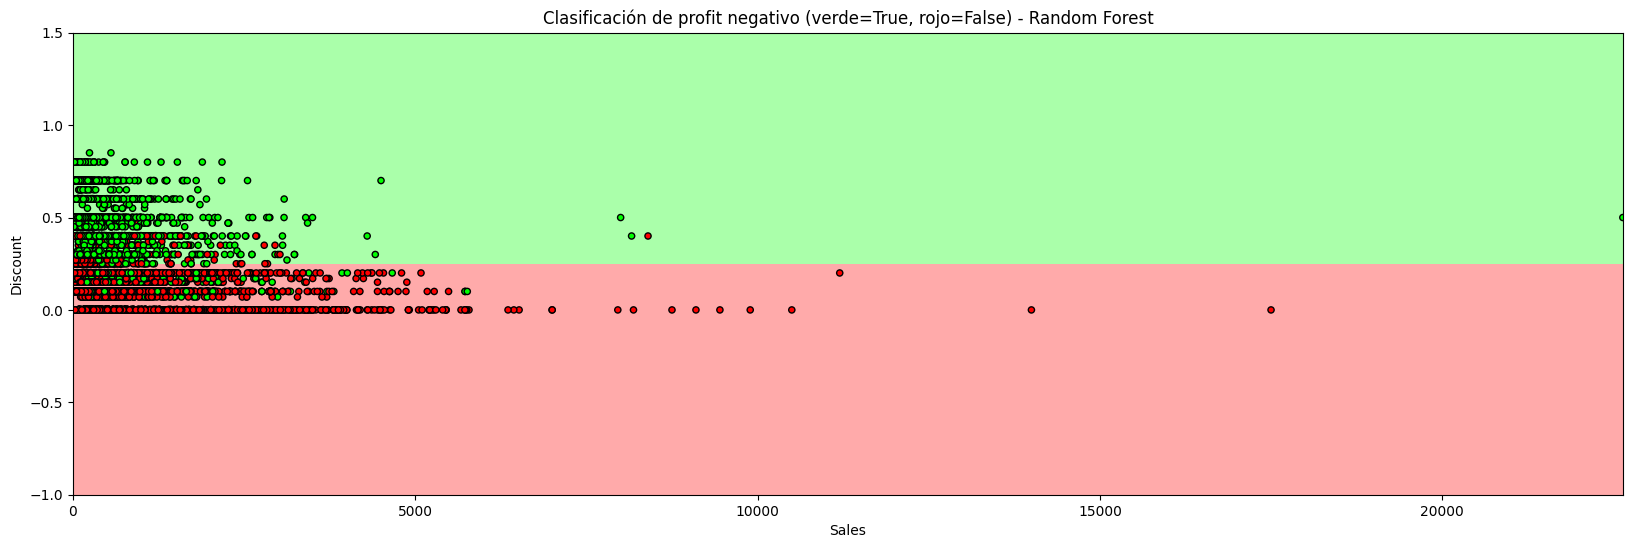

In [85]:
# Crear mapa de colores
cmap_light_mod = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold_mod = ListedColormap(['#FF0000', '#00FF00'])

# Crear una malla de puntos para graficar
x_min_mod, x_max_mod = X_mod[:, 0].min() - 1, X_mod[:, 0].max() + 1
y_min_mod, y_max_mod = X_mod[:, 1].min() - 1, X_mod[:, 1].max() + 1
xx_mod, yy_mod = np.meshgrid(np.arange(x_min_mod, x_max_mod, .5),
                     np.arange(y_min_mod, y_max_mod, .5))

# Lista de clasificadores
classifiers = [
    ("Naive Bayes", GaussianNB()),
    ("Linear Discriminant Analysis", LinearDiscriminantAnalysis()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier())
]

# Entrenar cada clasificador y generar el gráfico
for name, clf in classifiers:
    # Entrenar el modelo con las dos características principales
    clf.fit(X_mod, y_mod)

    # Predecir la clase para cada punto en la malla
    Z_mod = clf.predict(np.c_[xx_mod.ravel(), yy_mod.ravel()])

    # Poner el resultado en un gráfico de colores
    Z_mod = Z_mod.reshape(xx_mod.shape)

    # Establecer el tamaño del gráfico
    plt.figure(figsize=(20, 6))

    plt.pcolormesh(xx_mod, yy_mod, Z_mod, cmap=cmap_light_mod)

    # Agregar las etiquetas de los ejes
    plt.xlabel('Sales')
    plt.ylabel('Discount')

    # Graficar también los puntos de prueba
    plt.scatter(X_mod[:, 0], X_mod[:, 1], c=y_mod, cmap=cmap_bold_mod, edgecolor='k', s=20)
    plt.xlim(xx_mod.min(), xx_mod.max())
    plt.ylim(yy_mod.min(), yy_mod.max())
    plt.title(f"Clasificación de profit negativo (verde=True, rojo=False) - {name}")
    plt.show()


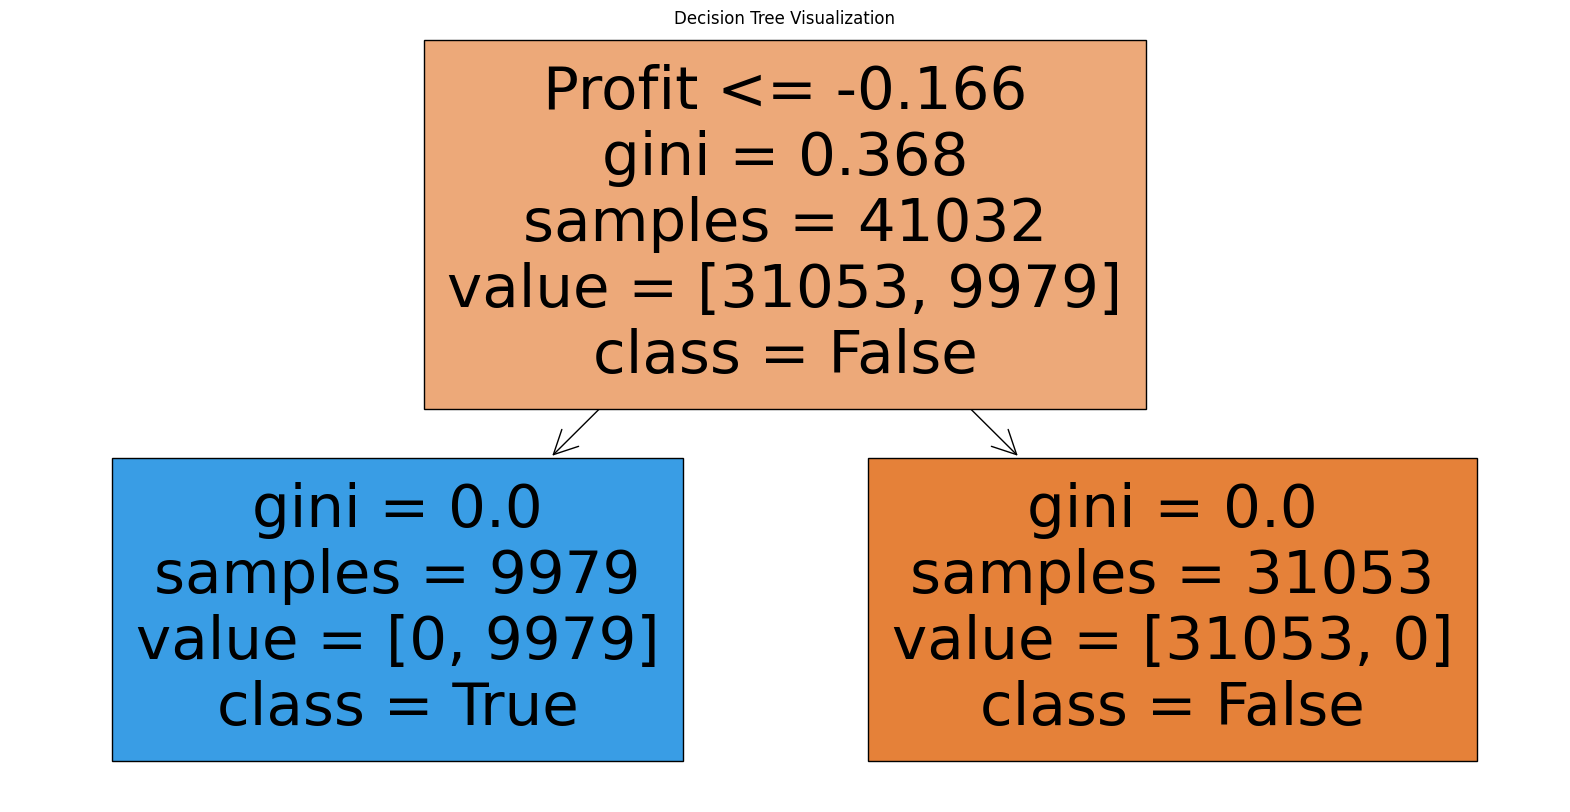

In [86]:
# Entrenar el modelo con 5 elementos
decision_tree = classifiers[2][1]
decision_tree.fit(X_train, y_train)

# Graficar el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['False', 'True'])
plt.title('Decision Tree Visualization')
plt.show()

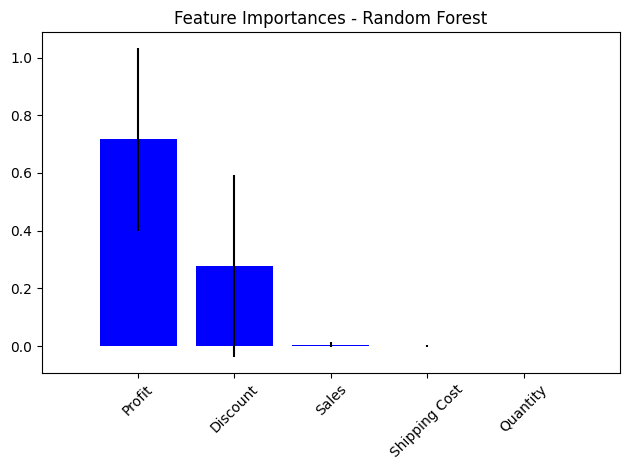

In [87]:
# Inicializar el clasificador Random Forest
random_forest = RandomForestClassifier()

# Entrenar el modelo
random_forest.fit(X_train, y_train)

# Obtener las importancias de las características
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Convertir X_train a DataFrame si no lo está
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=X.columns)

# Graficar las importancias de las características
plt.figure()
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)  # Utilizar los nombres de las columnas
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [88]:
# Define la cuadrícula de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]  # Rango amplio de valores para C
}

# Inicializa el clasificador de Regresión Logística
logistic_regression = LogisticRegression()

# Configura Grid Search con validación cruzada de 10 folds y maximización de recall
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=10, scoring='recall')

# Ahora puedes usar grid_search para ajustar a tus datos

In [89]:
# Ajusta Grid Search a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtén los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Accede al mejor modelo ajustado
best_model = grid_search.best_estimator_

# Ahora puedes usar best_model para predecir o evaluar tus datos de prueba, por ejemplo:
y_pred = best_model.predict(X_test)


Mejores hiperparámetros encontrados: {'C': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [90]:
from sklearn.linear_model import LogisticRegression

# Crea un nuevo modelo de Regresión Logística con C=100
best_model = LogisticRegression(C=100)

# Ajusta el modelo con tus datos de entrenamiento
best_model.fit(X_train, y_train)


LogisticRegression(C=100)

# Comparar y visualizar los valores reales y predichos por un modelo

Muestra de comparativa de valores reales y predichos:
       Real  Predicho
51009     1         1
33417     1         1
7069      0         0
4679      0         0
34893     1         1
30891     0         0
23652     0         0
18909     0         0
7555      0         0
15966     0         0

Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00      7693
        True       0.99      0.98      0.99      2565

    accuracy                           0.99     10258
   macro avg       0.99      0.99      0.99     10258
weighted avg       0.99      0.99      0.99     10258



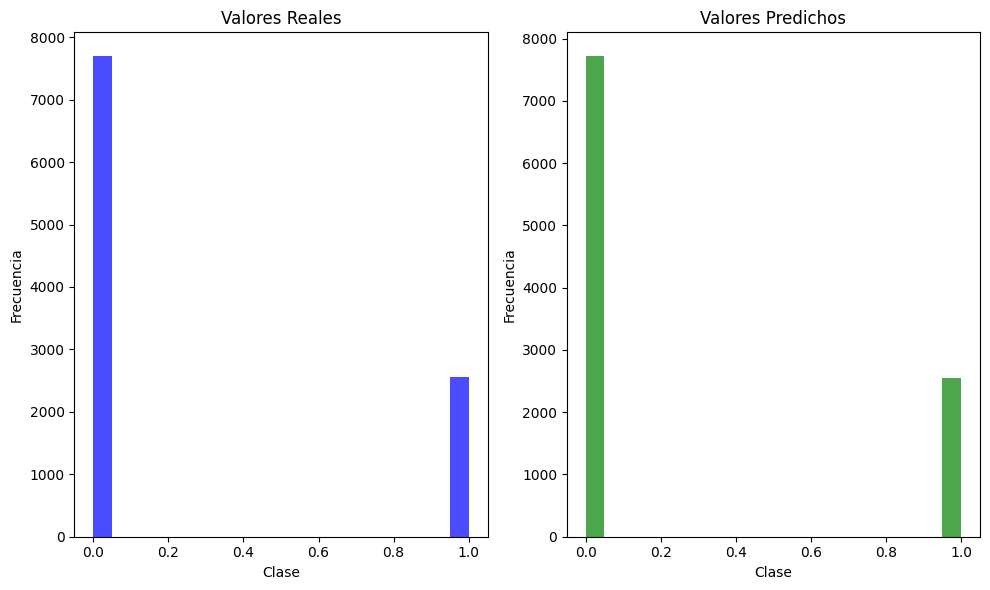

In [92]:
# Convertir a enteros
y_test_int = y_test.astype(int)
y_pred_int = y_pred.astype(int)

# Mostrar comparativa de valores reales y predichos
comparison = pd.DataFrame({'Real': y_test_int, 'Predicho': y_pred_int})

# Imprimir una muestra de la comparativa
print("Muestra de comparativa de valores reales y predichos:")
print(comparison.head(10))

# Mostrar el classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualizar comparativa gráfica de valores reales y predichos
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.title('Valores Reales')
plt.hist(y_test_int, color='blue', alpha=0.7, bins=20)
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.title('Valores Predichos')
plt.hist(y_pred_int, color='green', alpha=0.7, bins=20)
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


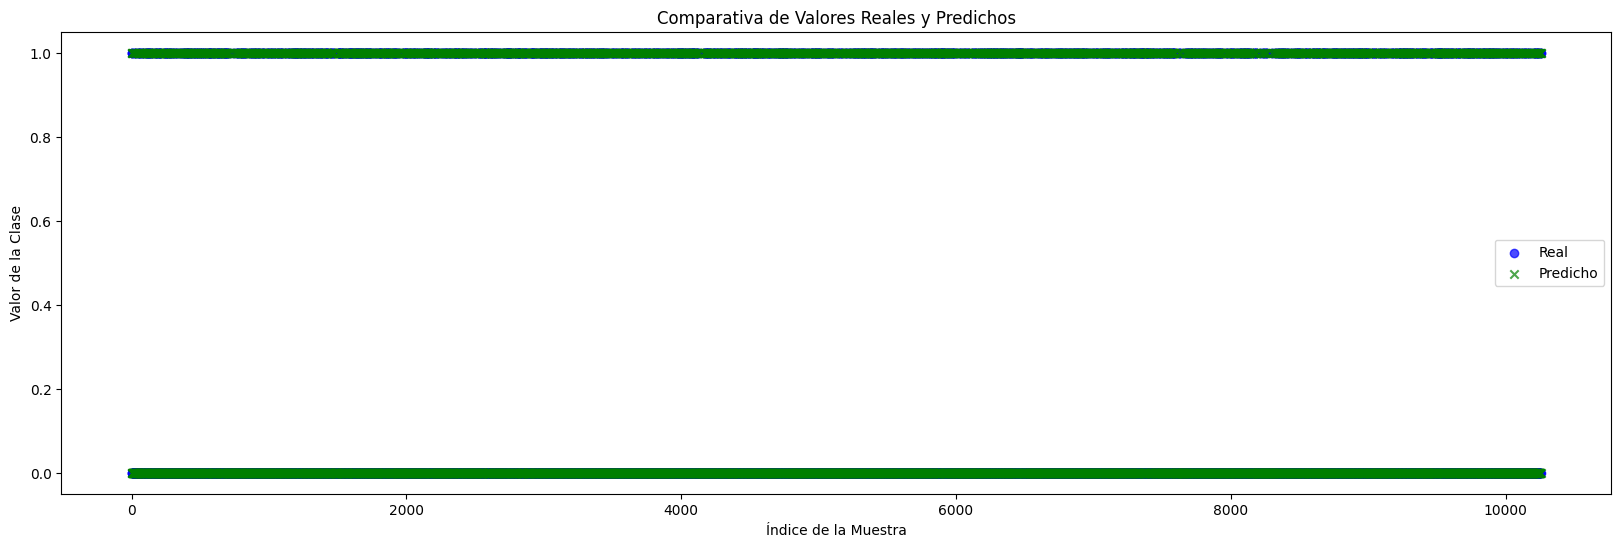

In [107]:
# Grafico alterno Scatter plot
plt.figure(figsize=(20, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real', marker='o', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, color='green', label='Predicho', marker='x', alpha=0.7)
plt.xlabel('Índice de la Muestra')
plt.ylabel('Valor de la Clase')
plt.title('Comparativa de Valores Reales y Predichos')
plt.legend()
plt.show()

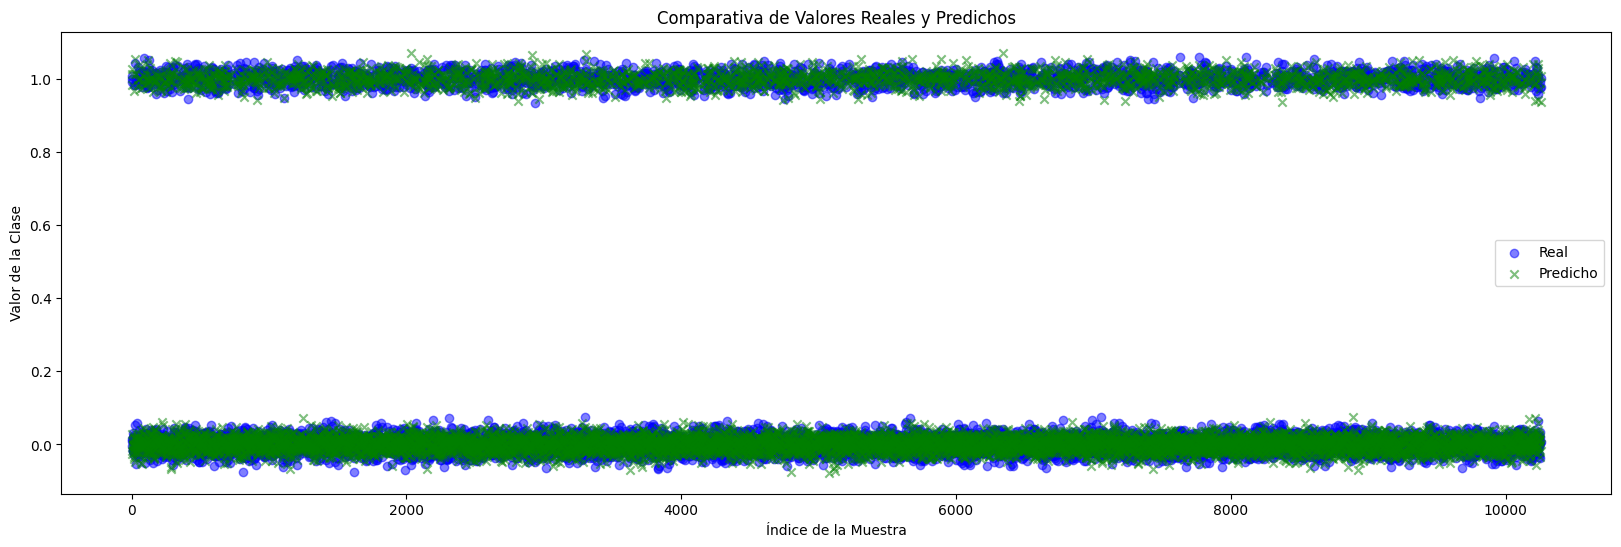

In [106]:
# Añadir una pequeña dispersión aleatoria para evitar solapamientos
y_test_jitter02 = y_test + np.random.normal(0, 0.02, size=y_test.shape)
y_pred_jitter02 = y_pred + np.random.normal(0, 0.02, size=y_pred.shape)

plt.figure(figsize=(20, 6))
plt.scatter(range(len(y_test)), y_test_jitter02, color='blue', label='Real', marker='o', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred_jitter02, color='green', label='Predicho', marker='x', alpha=0.5)
plt.xlabel('Índice de la Muestra')
plt.ylabel('Valor de la Clase')
plt.title('Comparativa de Valores Reales y Predichos')
plt.legend()
plt.show()

# Predicciones Erroneas


Predicciones incorrectas:
       Real  Predicho  Error
24013     1         0      1
5417      0         1      1
13377     0         1      1
2357      1         0      1
25223     1         0      1
24991     1         0      1
28049     1         0      1
10942     1         0      1
5435      1         0      1
2540      1         0      1


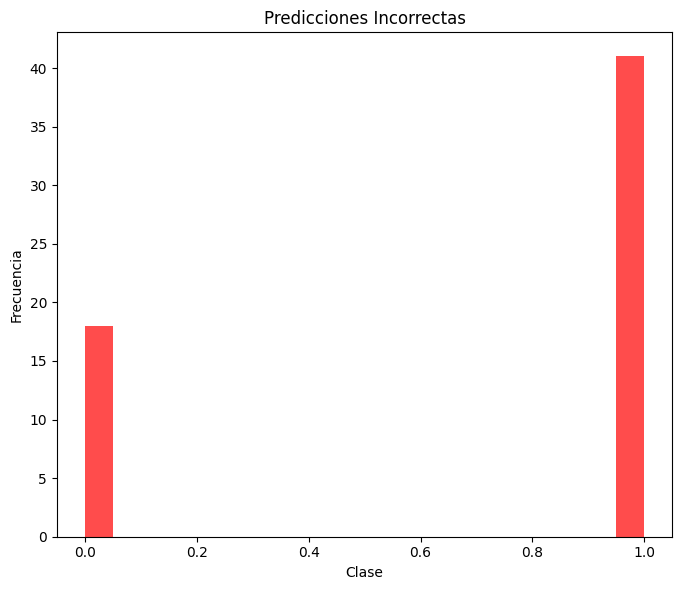

In [115]:
# Crear DataFrame de comparativa de valores reales y predichos
comparison = pd.DataFrame({'Real': y_test_int, 'Predicho': y_pred_int})
comparison['Error'] = np.where(comparison['Real'] != comparison['Predicho'], 1, 0)

# Crear DataFrame de predicciones incorrectas
incorrect_predictions = comparison[comparison['Error'] == 1]

# Imprimir una muestra de las predicciones incorrectas
print("\nPredicciones incorrectas:")
print(incorrect_predictions.head(10))

# Visualizar comparativa gráfica de valores reales y predichos
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 3)
plt.title('Predicciones Incorrectas')
plt.hist(incorrect_predictions['Real'], color='red', alpha=0.7, bins=20)
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

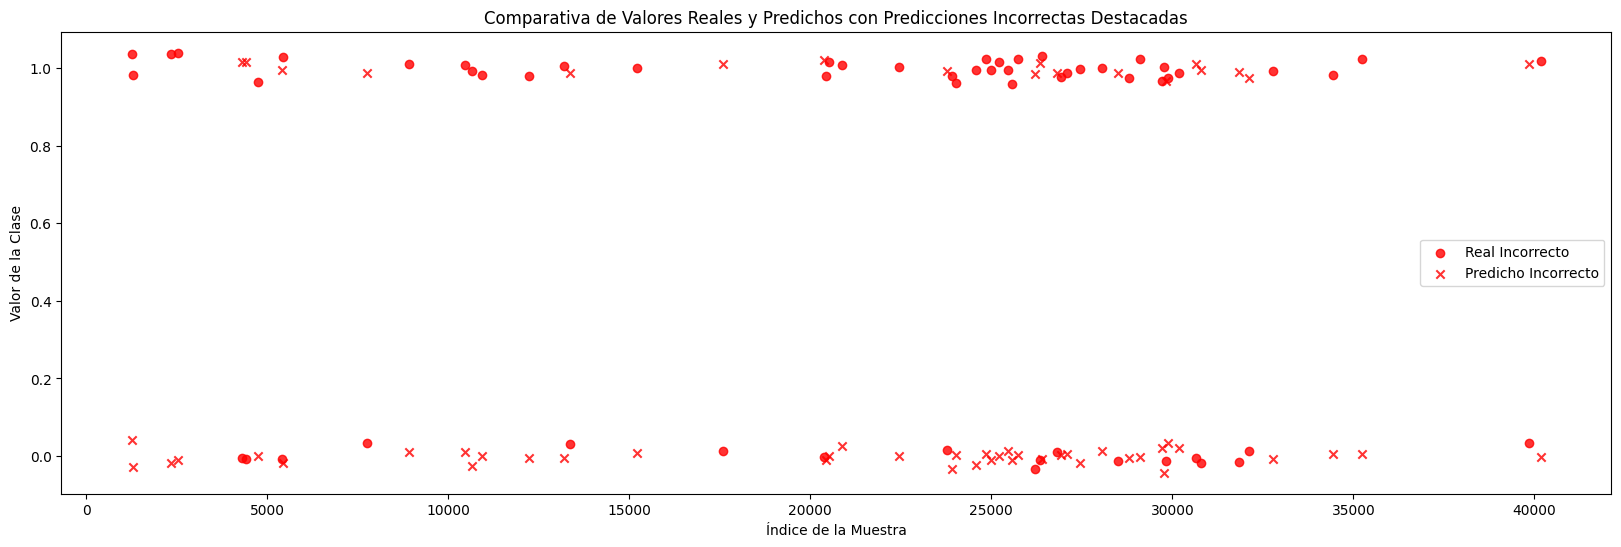

In [105]:
# Crear jitter para los valores predichos incorrectamente
incorrect_real_jitter = incorrect_predictions_df['Real'] + np.random.normal(0, 0.02, size=incorrect_predictions_df['Real'].shape)
incorrect_pred_jitter = incorrect_predictions_df['Predicho'] + np.random.normal(0, 0.02, size=incorrect_predictions_df['Predicho'].shape)

# Crear jitter para los valores reales y predichos completos
y_test_jitter02 = y_test + np.random.normal(0, 0.02, size=y_test.shape)
y_pred_jitter02 = y_pred + np.random.normal(0, 0.02, size=y_pred.shape)

# Plotting
plt.figure(figsize=(20, 6))

# # Graficar valores reales y predichos completos
# plt.scatter(range(len(y_test)), y_test_jitter02, color='blue', label='Real', marker='o', alpha=0.5)
# plt.scatter(range(len(y_pred)), y_pred_jitter02, color='green', label='Predicho', marker='x', alpha=0.5)

# Graficar valores predichos incorrectamente
plt.scatter(incorrect_predictions_df.index, incorrect_real_jitter, color='red', label='Real Incorrecto', marker='o', alpha=0.8)
plt.scatter(incorrect_predictions_df.index, incorrect_pred_jitter, color='red', label='Predicho Incorrecto', marker='x', alpha=0.8)

plt.xlabel('Índice de la Muestra')
plt.ylabel('Valor de la Clase')
plt.title('Comparativa de Valores Reales y Predichos con Predicciones Incorrectas Destacadas')
plt.legend()
plt.show()


- Errores de Clase 0 (Falsos Positivos): Cuando el valor real es 0, pero el modelo lo predijo como 1.
- Errores de Clase 1 (Falsos Negativos): Cuando el valor real es 1, pero el modelo lo predijo como 0.
- Círculos rojos (Valores reales incorrectos): Indican dónde están los valores verdaderos de las muestras mal clasificadas.
- Cruces rojas (Valores predichos incorrectos): Indican qué valores predijo el modelo incorrectamente para esas mismas muestras.